In [1]:
import sys
!{sys.executable} -m pip install numpy

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


In [2]:
import sys
!{sys.executable} -m pip install sko

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


In [85]:
from __future__ import division

In [86]:
import numpy as np , pandas as pd , matplotlib.pyplot as plt

In [87]:
from scipy import spatial

In [88]:
from sko.ACA import ACA_TSP

In [101]:
num_points = 500
points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')

In [102]:
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [103]:
def main():
    aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
                  size_pop=100, max_iter=10,
                  distance_matrix=distance_matrix)
    best_x, best_y = aca.run()
    # Plot the result
    fig, ax = plt.subplots(1, 2)
    best_points_ = np.concatenate([best_x, [best_x[0]]])
    best_points_coordinate = points_coordinate[best_points_, :]
    for index in range(0, len(best_points_)):
        ax[0].annotate(best_points_[index], (best_points_coordinate[index, 0], best_points_coordinate[index, 1]))
    ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
    pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
    plt.show()

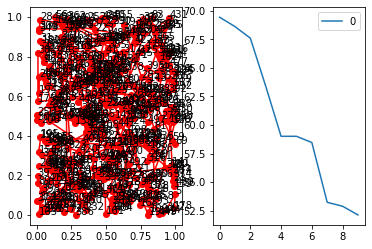

In [104]:
if __name__ == "__main__":
    main()